<a href="https://colab.research.google.com/github/MehediAhamed/vlmrun-cookbook/blob/us-driver-license-openai-comparison-removed/notebooks/02_case_study_drivers_license.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">
<p align="center" style="width: 100%;">
    <img src="https://raw.githubusercontent.com/vlm-run/.github/refs/heads/main/profile/assets/vlm-black.svg" alt="VLM Run Logo" width="80" style="margin-bottom: -5px; color: #2e3138; vertical-align: middle; padding-right: 5px;"><br>
</p>
<p align="center"><a href="https://docs.vlm.run"><b>Website</b></a> | <a href="https://docs.vlm.run/"><b>API Docs</b></a> | <a href="https://docs.vlm.run/blog"><b>Blog</b></a> | <a href="https://discord.gg/AMApC2UzVY"><b>Discord</b></a>
</p>
<p align="center">
<a href="https://discord.gg/AMApC2UzVY"><img alt="Discord" src="https://img.shields.io/badge/discord-chat-purple?color=%235765F2&label=discord&logo=discord"></a>
<a href="https://twitter.com/vlmrun"><img alt="Twitter Follow" src="https://img.shields.io/twitter/follow/vlmrun.svg?style=social&logo=twitter"></a>
</p>
</div>

Welcome to **[VLM Run Cookbooks](https://github.com/vlm-run/vlmrun-cookbook)**, a comprehensive collection of examples and notebooks demonstrating the power of structured visual understanding using the [VLM Run Platform](https://app.vlm.run).

## 🤓 Case Study: US Driver License Extraction

In this notebook, we'll walk through an example of extracting structured data from US driver license images using VLM Run.

### Environment Setup

To get started, install the VLM Run Python SDK and sign-up for an API key on the [VLM Run App](https://app.vlm.run).
- Store the VLM Run API key under the `VLMRUN_API_KEY` environment variable.

## Prerequisites

* Python 3.9+
* VLM Run API key (get one at [app.vlm.run](https://app.vlm.run))

## Setup

First, let's install the required packages:

In [1]:
! pip install vlmrun --upgrade --quiet
! pip install vlmrun-hub --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.3/151.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 795.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.2/788.2 kB 26.1 MB/s eta 0:00:00


In [2]:
! pip install pandas google-cloud-storage openai --quiet

In [3]:
import os
import getpass

VLMRUN_BASE_URL = os.getenv("VLMRUN_BASE_URL", "https://api.vlm.run/v1")
VLMRUN_API_KEY = os.getenv("VLMRUN_API_KEY", None)
if VLMRUN_API_KEY is None:
    VLMRUN_API_KEY = getpass.getpass()

··········


In [4]:
import pandas as pd
from PIL import Image

from vlmrun.common.image import encode_image
from vlmrun.common.utils import remote_image
from pathlib import Path
from google.cloud import storage

Loading images of licenses from cloud

In [5]:
BUCKET_NAME = "vlm-data-public-prod"
PREFIX = "hub/examples/document.us-drivers-license/us-dataset-2025-01-22"

storage_client = storage.Client.create_anonymous_client()
bucket = storage_client.bucket(BUCKET_NAME)
blobs = bucket.list_blobs(prefix=PREFIX)

image_urls = [
    f"https://storage.googleapis.com/{BUCKET_NAME}/{blob.name}"
    for blob in blobs
    if any(blob.name.lower().endswith(ext) for ext in ['.jpg', '.jpeg', '.png'])
]

In [6]:
df = pd.DataFrame({
    "image_path": image_urls,
    "image": [remote_image(url) for url in image_urls]
})

print(f"Loaded {len(image_urls)} driver's license images")
df.head()

Loaded 54 driver's license images


,image_path,image
0,https://storage.googleapis.com/vlm-data-public...,<PIL.Image.Image image mode=RGB size=650x406 a...
1,https://storage.googleapis.com/vlm-data-public...,<PIL.Image.Image image mode=RGB size=514x328 a...
2,https://storage.googleapis.com/vlm-data-public...,<PIL.Image.Image image mode=RGB size=700x439 a...
3,https://storage.googleapis.com/vlm-data-public...,<PIL.Image.Image image mode=RGB size=700x450 a...
4,https://storage.googleapis.com/vlm-data-public...,<PIL.Image.Image image mode=RGB size=700x448 a...


Display the loaded images

,image_path,image
0,https://storage.googleapis.com/vlm-data-public-prod/hub/examples/document.us-drivers-license/us-dataset-2025-01-22/Alabama.jpg,
1,https://storage.googleapis.com/vlm-data-public-prod/hub/examples/document.us-drivers-license/us-dataset-2025-01-22/Alaska.jpg,
2,https://storage.googleapis.com/vlm-data-public-prod/hub/examples/document.us-drivers-license/us-dataset-2025-01-22/Arizona.jpg,
3,https://storage.googleapis.com/vlm-data-public-prod/hub/examples/document.us-drivers-license/us-dataset-2025-01-22/Arkansas.jpg,
4,https://storage.googleapis.com/vlm-data-public-prod/hub/examples/document.us-drivers-license/us-dataset-2025-01-22/California.jpg,
5,https://storage.googleapis.com/vlm-data-public-prod/hub/examples/document.us-drivers-license/us-dataset-2025-01-22/Colorado.jpg,
6,https://storage.googleapis.com/vlm-data-public-prod/hub/examples/document.us-drivers-license/us-dataset-2025-01-22/Connecticut.jpg,
7,https://storage.googleapis.com/vlm-data-public-prod/hub/examples/document.us-drivers-license/us-dataset-2025-01-22/Delaware.jpg,
8,https://storage.googleapis.com/vlm-data-public-prod/hub/examples/document.us-drivers-license/us-dataset-2025-01-22/Florida.jpg,
9,https://storage.googleapis.com/vlm-data-public-prod/hub/examples/document.us-drivers-license/us-dataset-2025-01-22/Georgia.jpg,

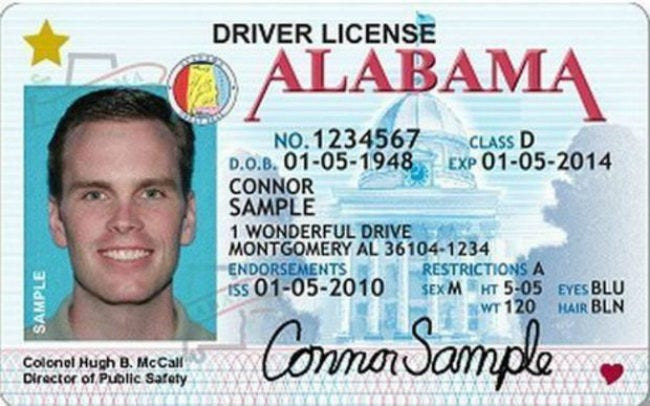
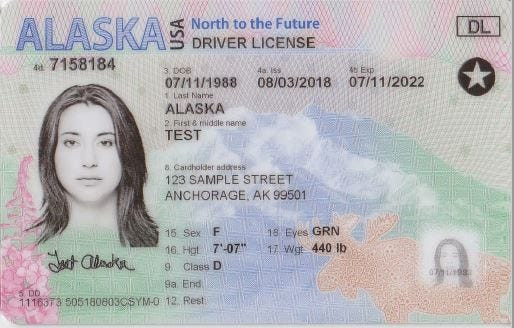
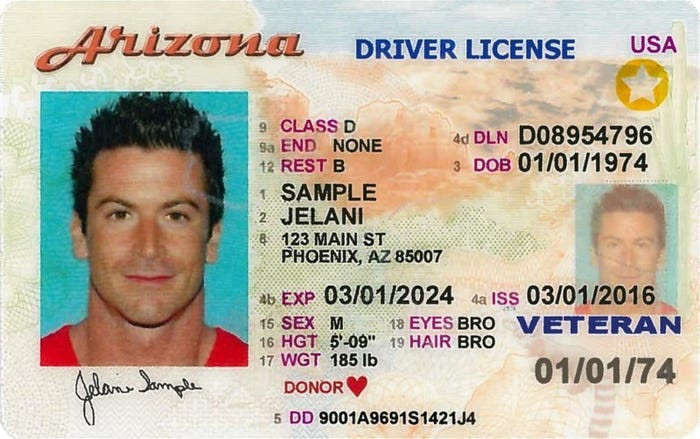
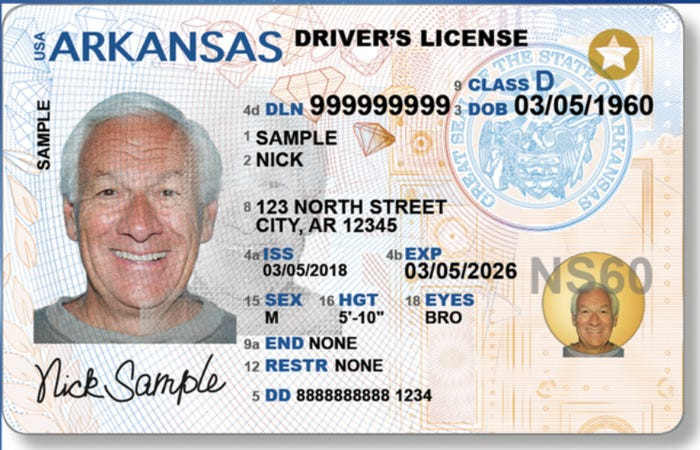
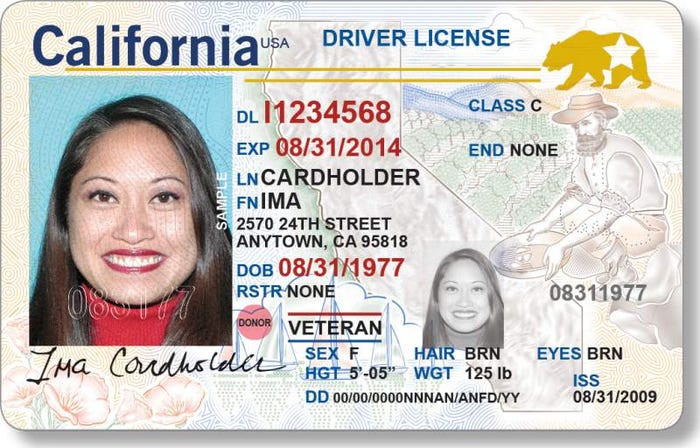
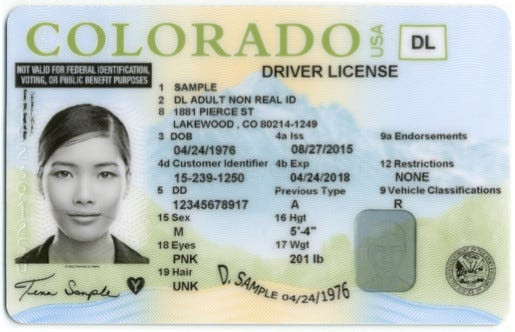
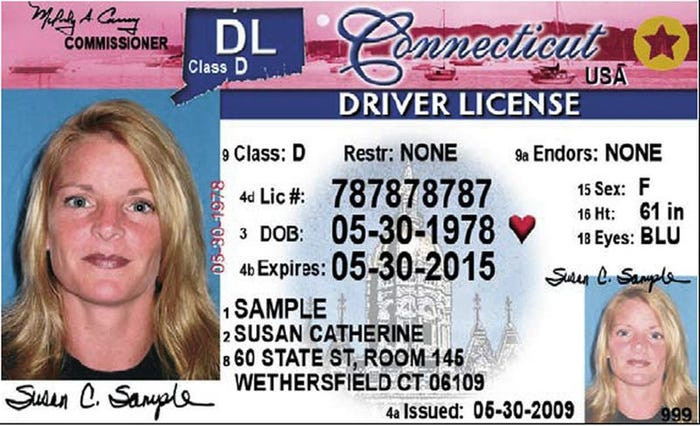
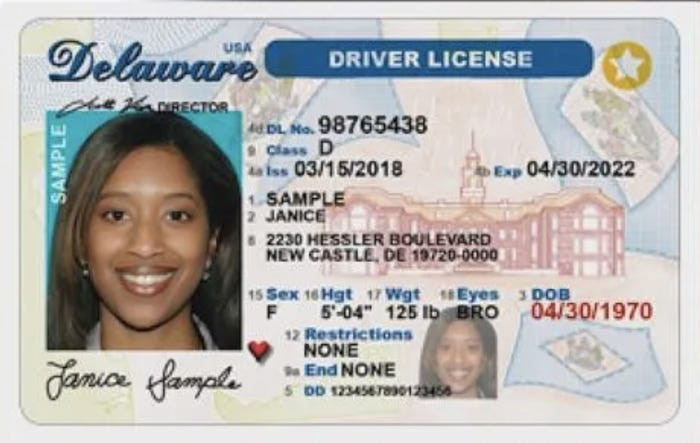
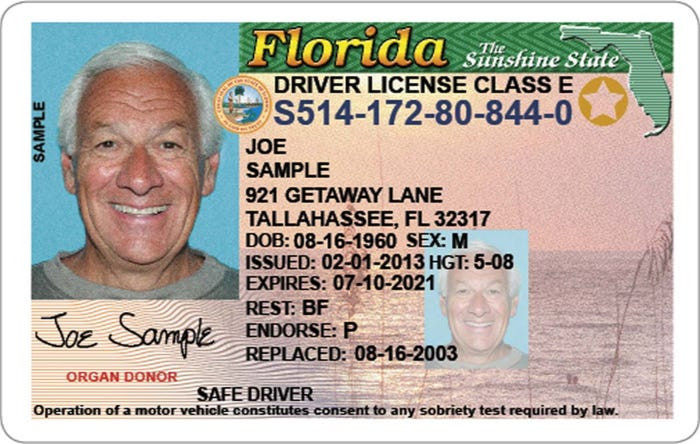
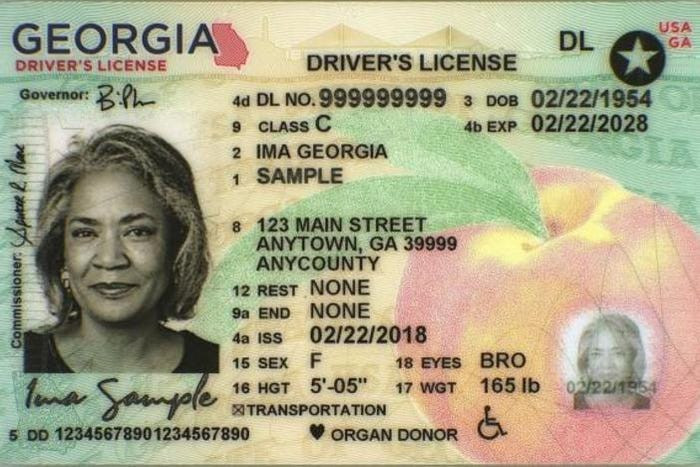

In [7]:
import json
from IPython.display import HTML, display

formatters = {
    "image": lambda x: f"<img src='{encode_image(x, format='JPEG')}' width='400'>"
}
cols = ["image_path", "image"]
display(HTML(df[cols].head(n=10).to_html(formatters=formatters, escape=False)))

Let's initialize the VLM Run Client

In [8]:
from vlmrun.client import VLMRun

client = VLMRun(base_url=VLMRUN_BASE_URL, api_key=VLMRUN_API_KEY)
client

VLMRun(base_url=https://api.vlm.run/v1, api_key=sk-8mwcx..., version=0.3.10)

Let's display the image and extract it's information

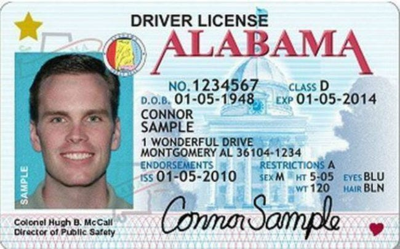

{
  "id": "110fe5d9-6c7d-4109-b6d0-416f244a4cc5",
  "created_at": "2025-12-18T13:17:12.952295",
  "completed_at": "2025-12-18T13:17:21.163483Z",
  "response": {
    "issuing_state": "AL",
    "license_number": "1234567",
    "full_name": "CONNOR SAMPLE",
    "first_name": "CONNOR",
    "middle_name": null,
    "last_name": "SAMPLE",
    "address": {
      "street": "1 WONDERFUL DRIVE",
      "city": "MONTGOMERY",
      "state": "AL",
      "zip_code": "36104-1234"
    },
    "date_of_birth": "1948-01-05",
    "gender": "M",
    "height": "5'5\"",
    "weight": 120.0,
    "eye_color": "BLU",
    "hair_color": "BLN",
    "issue_date": "2010-01-05",
    "expiration_date": "2014-01-05",
    "license_class": "D",
    "donor": null,
    "veteran": null
  },
  "status": "completed",
  "usage": {
    "elements_processed": 1,
    "element_type": "image",
    "credits_used": 2
  },
  "domain": "document.us-drivers-license"
}


In [9]:
# Display a sample image
image = df["image"][0]
W, H = image.size
display(image.resize((400, int(400 * H / W))))

# Generate the response for the sample image
response = client.image.generate(
    images=[image],
    domain="document.us-drivers-license"
)
print(response.model_dump_json(indent=2))

Now extract informations of different licenses to examine VLM Run's capability

In [15]:
from vlmrun.hub.schemas.document.us_drivers_license import USDriversLicense

def get_responses(df: pd.DataFrame) -> pd.DataFrame:

    def process_single_image(image):
        # Generate the response for the image using VLM Run
        vlm_response = client.image.generate(
            images=[image],
            domain="document.us-drivers-license"
        )

        return pd.Series({
            'vlm_response': vlm_response,
        })

    # Process all images and combine results
    responses = df['image'].apply(process_single_image)
    return pd.concat([df, responses], axis=1)


df_results = get_responses(df)
df_results.head()

,image_path,image,vlm_response
0,https://storage.googleapis.com/vlm-data-public...,<PIL.Image.Image image mode=RGB size=650x406 a...,id='429bd892-fff3-43c7-a134-a2b52760e8fa' crea...
1,https://storage.googleapis.com/vlm-data-public...,<PIL.Image.Image image mode=RGB size=514x328 a...,id='fcaf3843-9d12-4086-92f2-e125d7689e73' crea...
2,https://storage.googleapis.com/vlm-data-public...,<PIL.Image.Image image mode=RGB size=700x439 a...,id='157299c6-8158-43ae-8356-239950c698c6' crea...
3,https://storage.googleapis.com/vlm-data-public...,<PIL.Image.Image image mode=RGB size=700x450 a...,id='d258b302-485d-4ebf-9f0b-2f9238418db8' crea...
4,https://storage.googleapis.com/vlm-data-public...,<PIL.Image.Image image mode=RGB size=700x448 a...,id='82538acf-474c-4873-bea1-beade3ffd841' crea...


Now comparing the results side by side with images of licenses


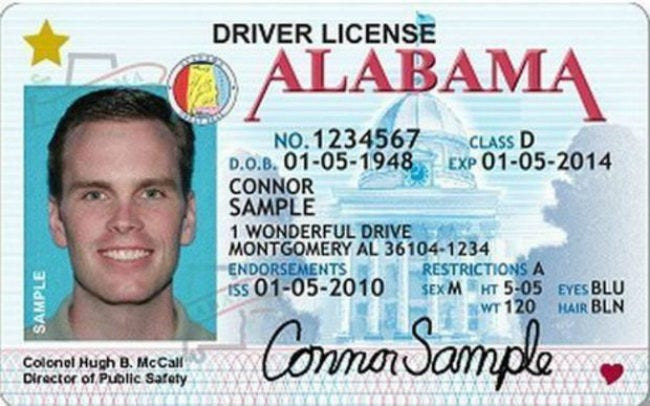
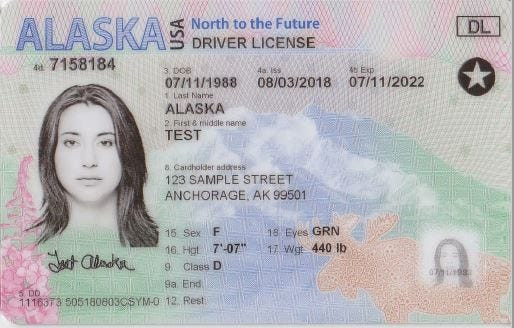
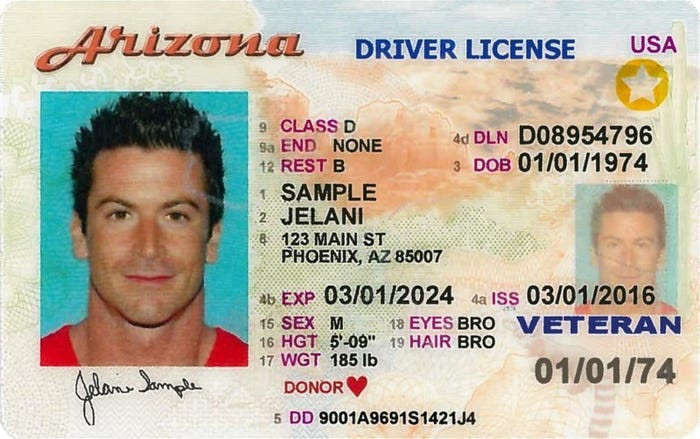
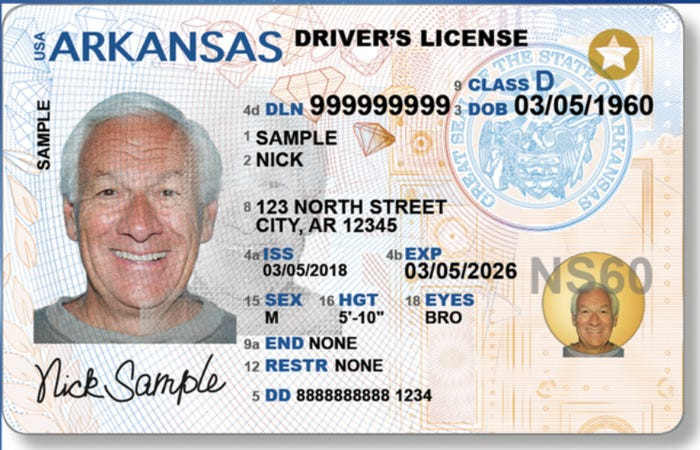
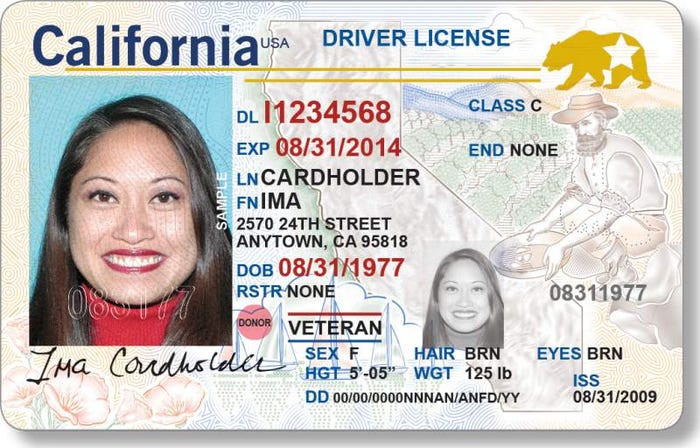
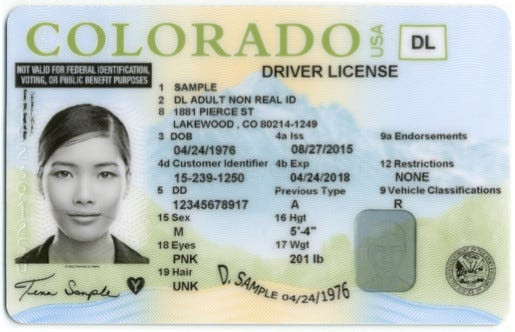
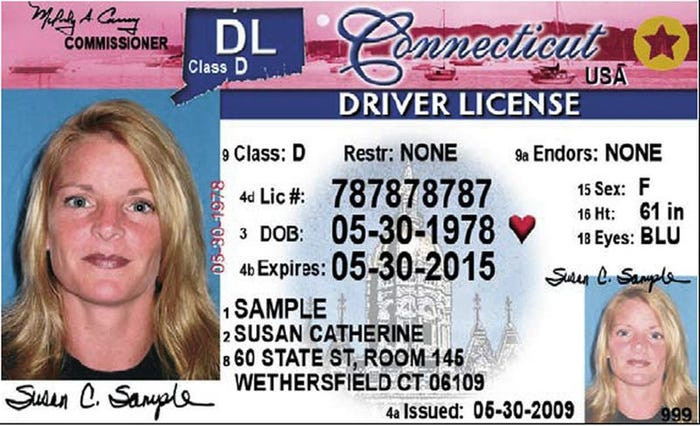
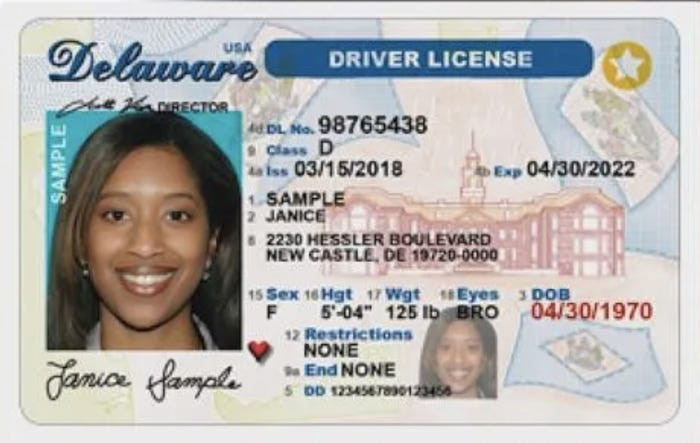
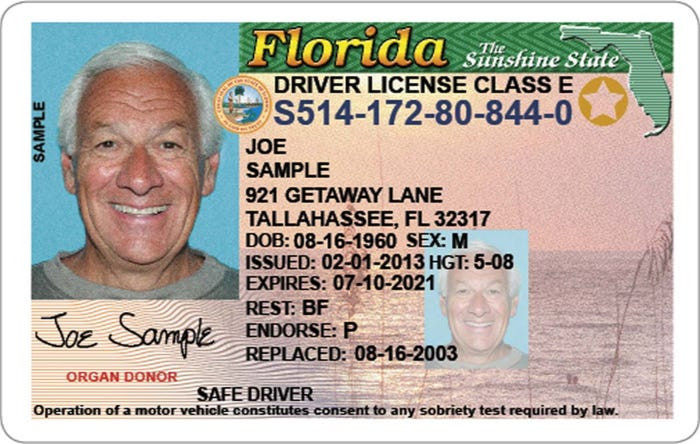
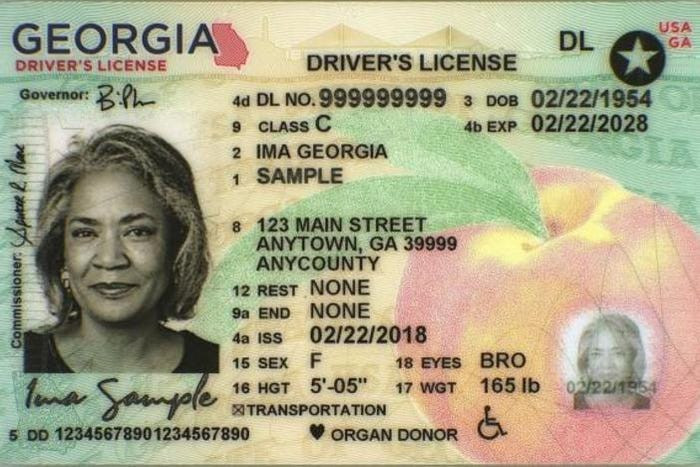

In [18]:
import json
from IPython.display import HTML, display

def extract_vlm_text(vlm):
    for attr in ["response", "text", "output"]:
        if hasattr(vlm, attr):
            return getattr(vlm, attr)
    if hasattr(vlm, "outputs") and len(vlm.outputs) > 0:
        return vlm.outputs[0].text
    return str(vlm)  # fallback

def format_display(row):
    vlm_text = extract_vlm_text(row["vlm_response"])

    return f"""
    <div style="border:1px solid #444; padding:15px; margin:12px 0; border-radius:8px; background:#121212;">
        <div style="display:flex; gap:20px;">
            <div style="flex:1;">
                <h4 style="color:#f1f1f1;">Image</h4>
                <img src="{encode_image(row['image'], format='JPEG')}"
                     width="300"
                     style="border:1px solid #666; border-radius:6px;">
            </div>
            <div style="flex:2;">
                <h4 style="color:#8ecae6;">VLM Response</h4>
                <pre style="
                    background:#1e1e1e;
                    color:#eaeaea;
                    padding:12px;
                    border-radius:6px;
                    border-left:4px solid #219ebc;
                    white-space:pre-wrap;">
{vlm_text}
                </pre>
            </div>
        </div>
    </div>
    """
display(HTML(
    df_results.head(10).apply(format_display, axis=1).str.cat(sep="\n")
))


## Additional Resources
- [VLM Run Documentation](https://docs.vlm.run)
- [API Reference](https://docs.vlm.run/)
- [More Examples](https://github.com/vlm-run/vlmrun-cookbook)
- [Lance Hybrid Search](https://lancedb.github.io/lancedb/hybrid_search/hybrid_search/)
- [Fashion Dataset](https://huggingface.co/datasets/ashraq/fashion-product-images-small)